# ECE 364 Lecture 7
## Automatic Differentiation: Derivatives, gradients, and gradient descent

## Lecture goals

After this lecture, you should be able to:
* Compute the derivative, partial derivative, and gradient of single variable and multivariable functions.
* Utilize the derivative or gradient of a function to search for a local minimum or maximum of a function.
* Explain the motivation for gradient descent in terms of identifying local extrema in a function.
* Derive and apply gradient descent update equations for basic optimization problems

## Review of Derivatives

Recall that with a differentiable function of a single variable, we can determine the slope at any point of the function by computing the derivative of the function. By definition, the derivative of a function $f(x)$ is given by
$$
\frac{df}{dx}=\underset{h\to 0}{\lim}\frac{f(x+h)-f(x)}{h}.
$$
Applying this definition, we identified many simple rules in Calculus courses to compute the derivative of common functions including
\begin{align*}
    \frac{d}{dx}ax &= a,~a\in\mathbb{R}\\
    \frac{d}{dx}x^{p} &= px^{p-1},~p\in\mathbb{Z}\\
    \frac{d}{dx}\mathrm{ln}(x) &= \frac{1}{x}\\
    \frac{d}{dx}\sin(x) &= \cos(x)\\
    \frac{d}{dx}\cos(x) &= -\sin(x)
\end{align*}
and many more.

### Chain Rule
Using these rules for computing the derivative, we may also find the derivative of more complicated compositions of functions by the **chain rule**. For example, suppose we have the following function:
$$
f(x) = p(h(g(x)).
$$
By the chain rule, we can unroll this derivative by *chaining* together and multiplying simpler constituent derivatives:
$$
\frac{df}{dx} = \frac{df}{dp}\frac{dp}{dh}\frac{dh}{dg}\frac{dg}{dx}.
$$
For example, let $f(x)$ be
$$
f(x) = \ln\left(x^2+1\right).
$$
We then have
\begin{align*}
    g(x) &= x^2\\
    h(g) &= g + 1\\
    p(h) &= \ln(h)\\
    f(p) &= p.
\end{align*}
Computing each of the derivatives, we may apply chain rule to obtain $\frac{df}{dx}$:
\begin{align*}
    \frac{dg}{dx} &= 2x\\
    \frac{dh}{dg} &= 1\\
    \frac{dp}{dh} &= \frac{1}{h}\\
    \frac{df}{dp} &= 1\\
    \frac{df}{dx} &= \left(1\right)\left(\frac{1}{h}\right)\left(1\right)\left(2x\right)\\
    &= \frac{2x}{x^2+1}.
\end{align*}
In summary, chain rule provides a systematic and scalable way to construct complicated derivatives from a simple pre-defined set of rules. This idea will be critical to our upcoming discussion of auto-differentiation and backpropagation.

## Review of Partial Derivatives and Gradients

We also frequently work with functions that have multiple parameters or variables. For now, we may take these functions as using multiple independent variables in order to compute one scalar dependent variable or output. An example multi-variable function could be
$$
f(x, y, z) = 3x^2\ln(y)\cos(z)
$$
Like with single-variable functions, we can compute derivatives of multi-variable functions called **partial derivatives**. To compute a partial derivative, we focus on one variable at a time, while treating all other variables as constants. Thus, for this example functions, we have the following partial derivatives:
\begin{align*}
\frac{\partial f}{\partial x} &= 6x\ln(y)\cos(z)\\
\frac{\partial f}{\partial y} &= \frac{3x^2\cos(z)}{y}\\
\frac{\partial f}{\partial z} &= -3x^2\ln(y)\sin(z)
\end{align*}
A generalization of partial derivatives for a multi-variable function is the **gradient**, denoted by $\nabla f$:
$$
\nabla f(x, y, z) = \begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}\\
\frac{\partial f}{\partial z}
\end{bmatrix}
$$
Recall from Calculus 3 that the gradient evaluated at any given point $(x, y, z)$ gives the direction of *steepest ascent* for the function $f(x, y, z)$. **This point will be important to remember in the next section!**

## Derivatives and Optimization
In machine learning and data science applications, we are often concerned with minimizing or maximizing some objective function or loss function. For example, minimizing errors in predicting "cat" vs. "dog" in an image or maximizing customer satisfaction with a recommender system. Thus, we commonly try to identify local (or global) extrema (minima and maxima) or develop a procedure to get close to one.

Recall from calculus, that such extrema or critical points are defined by the derivative being zero. For example, the function $f(x)=(x-3)^2$ is minimized at $x=3$. We can verify this by taking the derivative $f'(x)=2(x-3)$ and setting equal to zero. The same is true for multi-variable functions, except we seek to make the gradient zero.

However, we may not always be able to easily identify the minima or maxima of a function. This may be because there is no closed-form solution or such a solution is extremely difficult to obtain. Consider the following function:
$$
f(x) = \frac{1}{3}(x-1)^6-(x-2)^5+5x^4.
$$

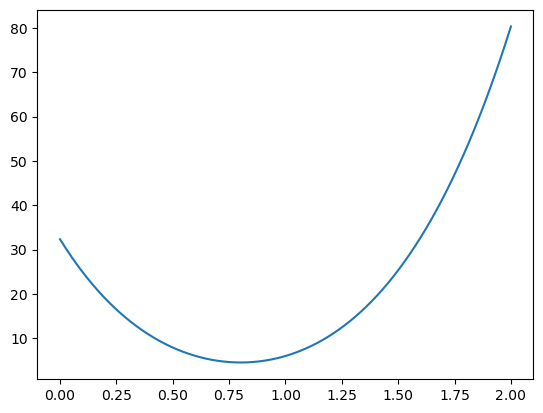

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 1000)
f_x = (1/3)*(x-1)**6-(x-2)**5+5*x**4
plt.figure()
plt.plot(x, f_x)

The derivative is then given by
$$
\frac{df}{dx} = 2(x-1)^5-5(x-2)^4+20x^3.
$$
Finding the roots, i.e. where $f'(x)=0$, is intractable to perform by hand. However, instead of finding where $f'(x)=0$, perhaps we can make a guess, then iteratively update our guess to try and decrease the magnitude of the derivative at the point of our guess. If do this over and over, we may hope to achieve (or come very close to) the minimum or maximum. One possible solution like this is known as **gradient descent**.

## Gradient Descent
Earlier, we noted that the gradient (and by analogy the derivative) points in the direction of steepest ascent or increase for a scalar function. If we follow the direction of the gradient, we will most rapidly increase our function. However, if we would like to minimize our function (as is more often the case), we should step in the direction of the negative gradient. This is the key idea behind the incredibly important gradient descent algorithm.

Suppose we have a differentiable function $f(x)$ that we would like to minimize but cannot find a closed form solution for the minimum. Instead, we will initialize a guess for the minimum, denoted as $x^{(0)}$. We will then update $x$ to the next guess by moving its value opposite of the gradient to $x^{(1)}$ and so on until the gradient is zero or sufficiently close to zero. Formally, we will iterate the following **gradient descent update equation**
$$
x^{(k+1)}=x^{(k)}-\alpha \nabla f(x).
$$
Above, $\alpha >0$ is known as the **step-size** for gradient descent and controls how big our steps are in the direction of the negative gradient (more on selecting $\alpha$ in future lectures!). Note also that we are using the gradient notation even for single variable functions to generalize to when we consider the multivariable case.

Before returning to the difficult problem from the previous section, let's consider a simpler function to empirically verify how gradient descent works. For this example, let
$$
f(x) = (x-1)^2.
$$
By inspection or setting the derivative to zero, we know that the minimum is at $x=1$. However, let's try using gradient descent instead with an initial guess of $x^{(0)}=4$ and $\alpha=\frac{1}{4}$. First, we identify the gradient (derivative):
$$
\nabla f(x) = 2x-2.
$$
Now, we may proceed to update the values of $x^{(k)}$:
\begin{align*}
 x^{(1)} &= x^{(0)}-\alpha\nabla f(x^{(0)})\\
 &= 4-\frac{1}{4}(2(4)-2)\\
 &= \frac{5}{2}\\
 x^{(2)} &= x^{(1)}-\alpha\nabla f(x^{(1)})\\
 &= \frac{5}{2}-\frac{1}{4}(2(\frac{5}{2})-2)\\
 &= \frac{7}{4}\\
 x^{(3)} &= x^{(2)}-\alpha\nabla f(x^{(2)})\\
 &= \frac{7}{4}-\frac{1}{4}(2(\frac{7}{4})-2)\\
 &= \frac{11}{8}
\end{align*}
... and so on! We see that these values are steadily approaching $x=1$ and will stop updating when $x=1$ since the derivative is zero there. Automating this process, we may iterate gradient descent many times as follows.

Iterates of x:
[4, 2.5, 1.75, 1.375, 1.1875, 1.09375, 1.046875, 1.0234375, 1.01171875, 1.005859375, 1.0029296875, 1.00146484375, 1.000732421875, 1.0003662109375, 1.00018310546875, 1.000091552734375, 1.0000457763671875, 1.0000228881835938, 1.0000114440917969, 1.0000057220458984, 1.0000028610229492, 1.0000014305114746, 1.0000007152557373, 1.0000003576278687, 1.0000001788139343, 1.0000000894069672, 1.0000000447034836, 1.0000000223517418, 1.000000011175871, 1.0000000055879354, 1.0000000027939677]


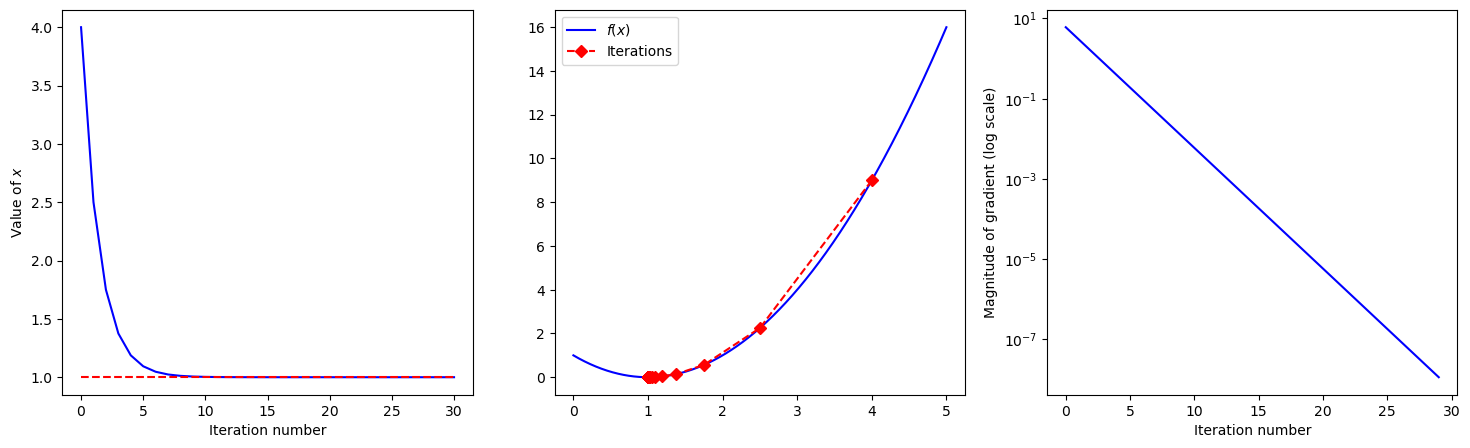

In [2]:
n_iter = 30 # number of iterations
x_init = 4 # initial guess for x
alpha = 1/4 # step size
x_values = [x_init]
function_values = [(x_init-1)**2]
x = x_init
gradients = []
for n in range(n_iter):
    gradient = 2*x-2
    x_next = x - alpha*gradient # gradient descent update step
    x_values.append(x_next) # log next value of x
    function_values.append((x_next-1)**2) # log next value of the function
    gradients.append(gradient) # log current gradient value
    x = x_values[-1] # update current value of x for next iteration

# plot x values vs iteration number
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(x_values, color='blue')
plt.hlines(1, 0, n_iter, colors='red', linestyles='dashed')
plt.xlabel('Iteration number')
plt.ylabel('Value of $x$')
plt.subplot(132)
x_grid = np.linspace(0, 5, 1000)
f_x = (x_grid-1)**2
plt.plot(x_grid, f_x, 'blue', label=r'$f(x)$')
plt.plot(x_values, function_values, 'r--', marker='D', label='Iterations')
plt.legend()
plt.subplot(133)
plt.semilogy(np.abs(gradients), color='blue')
plt.xlabel('Iteration number')
plt.ylabel('Magnitude of gradient (log scale)')

print('Iterates of x:\n{}'.format(x_values))

## Lecture exercise
Apply gradient descent to the previous complicated function to approximate the value of $x$ that minimizes $f(x)$. For convenience:
$$
\begin{align*}
    f(x) &= \frac{1}{3}(x-1)^6-(x-2)^5+5x^4\\
    \frac{df}{dx} &= 2(x-1)^5-5(x-2)^4+20x^3\\
    x^{(k+1)} &= x^{(k)}-\alpha\nabla f(x).
\end{align*}
$$
Use a starting point of $x^{(0)}=0$ and $\alpha=10^{-3}$. Run gradient descent for 100 iterations, plot the values of $x^{(k)}$, and the magnitude of the gradient at each iteration.

**Bonus: try varying the initial value of $x$ and choice of $\alpha$.**

[0, 0.082, 0.15095792132784314, 0.21021786279251584, 0.261952927172294, 0.30765779605452687, 0.3484066449153722, 0.38499910892624983, 0.4180480055532763, 0.44803464073540344, 0.47534506884119865, 0.5002946526109081, 0.5231451630840259, 0.5441169702663817, 0.5633979143580785, 0.5811498792253643, 0.5975137424450868, 0.6126131575420016, 0.6265574827007474, 0.6394440767534555, 0.6513601201194362, 0.6623840749451266, 0.6725868683087609, 0.6820328607724608, 0.6907806470239147, 0.6988837240207518, 0.7063910536996304, 0.713347541094309, 0.7197944440357265, 0.7257697270691436, 0.731308369524068, 0.7364426355994899, 0.741202312724998, 0.7456149232136121, 0.7497059132499837, 0.7534988224945997, 0.7570154369829603, 0.7602759275221093, 0.7632989754076563, 0.7661018869812735, 0.7687006983051613, 0.7711102710334599, 0.7733443804011366, 0.7754157961208203, 0.7773363568713307, 0.7791170389735491, 0.780768019776068, 0.7822987362118098, 0.7837179389352065, 0.7850337424057415, 0.7862536712462223, 0.787384

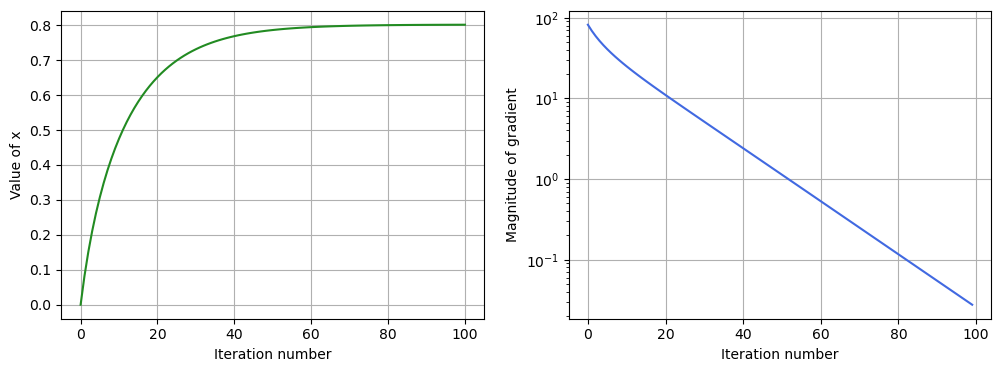

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_iter = 100 # number of iterations
x_init = 0 # initial guess for x
alpha = 1e-3 # step size, 10**-3
x_values = [x_init]
x = x_init
gradients = []
for n in range(n_iter):
    # calculate gradient
    gradient = 2*(x-1)**5 - 5*(x-2)**4 + 20*x**3
    # perform gradient descent step to obtain next value
    x_next = x - alpha*gradient
    # store values of x and gradient
    x_values.append(x_next)
    gradients.append(gradient)
    # update x for next step
    x = x_next

# plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(np.arange(len(x_values)), x_values, 'forestgreen')
plt.xlabel('Iteration number')
plt.ylabel('Value of x')
plt.grid(True)
plt.subplot(122)
plt.semilogy(np.arange(n_iter), np.abs(gradients), 'royalblue')
plt.xlabel('Iteration number')
plt.ylabel('Magnitude of gradient')
plt.grid(True)

print(x_values)

Much more can be shown about gradient descent including variations on gradient descent, convergence guarantees, convergence rates, and more. For the purposes of this course, we primarily need to motivate the use of gradient descent for machine learning problems and other interesting details are best left to ECE 490: Introduction to Optimization.

## Automatic Differentiation

We have motivated the use of gradients and derivatives for optimizing functions; however, the question remains how we can do this at a large scale. In other words, when functions or algorithms become complicated and their gradients similarly complex, is it feasible to program the entire set of partial derivatives by hand? The answer, unfortunately, is no and we must develop an efficient and exact method for computing gradients automatically for arbitrarily complicated functions. There are a few options:

* Numeric differentiation, i.e. finite differences: choose a suitably small value of $h$ to approximate $f'(x)$.
  $$
  \frac{df}{dx} = \underset{h\to 0}{\textrm{lim}}~\frac{f(x+h)-f(x)}{h}
  $$


* Symbolic differentiation: compose derivatives/gradients in symbolic closed-form using simple rules, i.e. chain rule. Evaluate this expression to compute gradients.

* Backpropagation: construct a computational graph of a function and use simple derivative/gradient rules to evaluate small pieces of the gradient and accumulate results via chain rule. (**This is what we will use!**)

## Lecture Discussion
What may be the pros and cons of each method?

* Numeric differentiation

Pros: Easy to implement

Cons: Restricted by the computational precision of the computer, only an approximation, choosing h is difficult

* Symbolic differentiation
  
Pros: Can exactly compute the gradient, we can see the symbolic gradient

Cons: Computationally inefficient (the expressions can become exponentially large)

* Backpropagation
  
Pros: Extremely scalable and computationally efficient for machine learning applications

Cons: